In [1]:
import polarization_rotator as pr

import numpy as np
import random
from math import pi,cos,sin,sqrt

from py_pol.stokes import Stokes
from py_pol.utils import degrees
from py_pol.drawings import draw_poincare,draw_stokes_points,draw_empty_sphere
from scipy.spatial.transform import Rotation as R



%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter

Final rotation: rotate  152.73672757236216  degrees around vector  [-0.74848051 -0.31063104  0.58590553]
Axis equal not supported by your current version of Matplotlib


/home/denis/.local/lib/python3.8/site-packages/py_pol/drawings.py:173: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


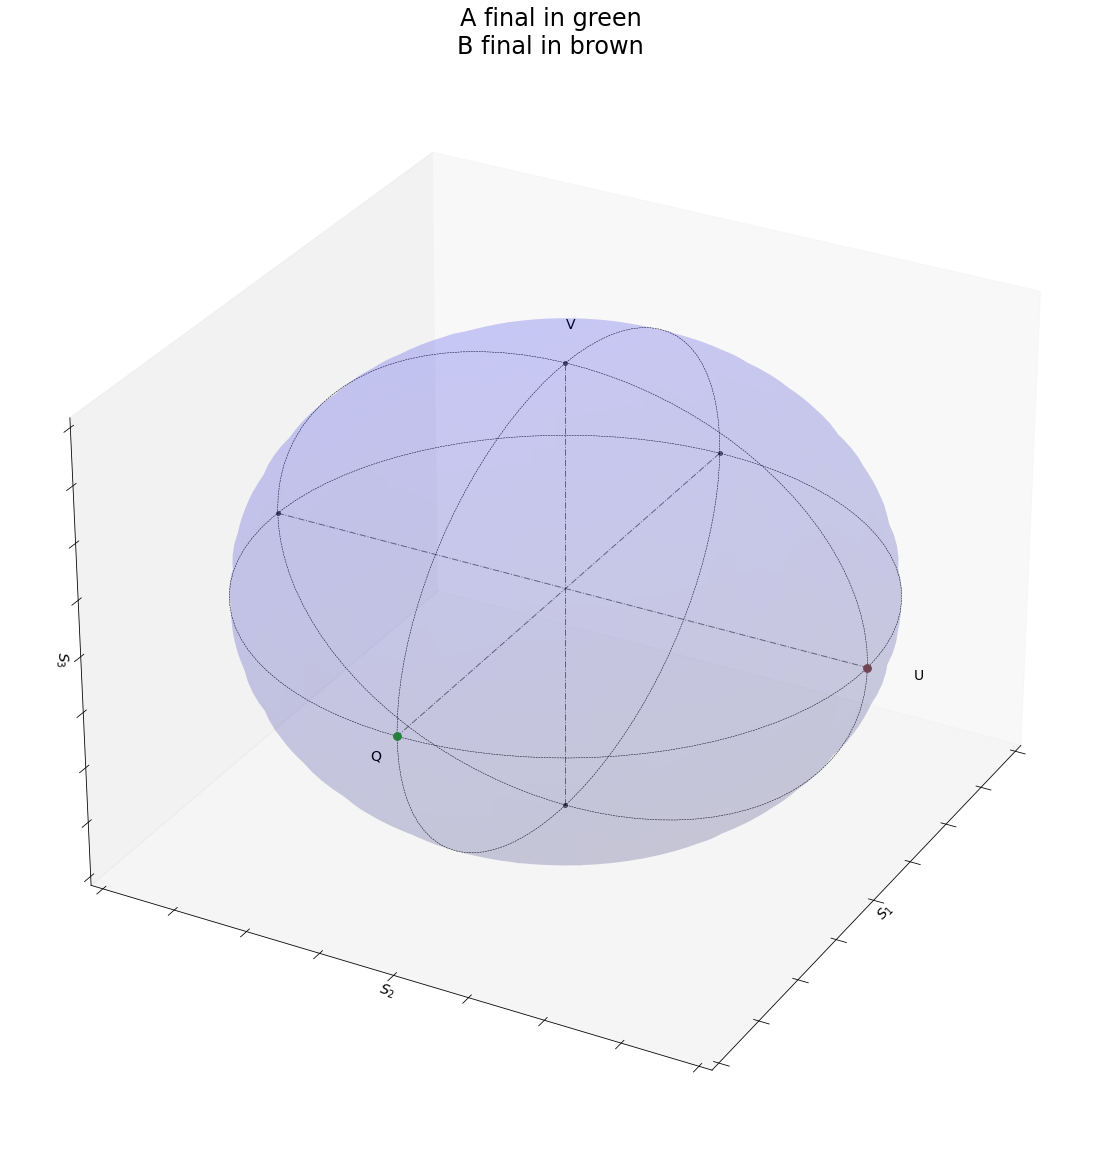

In [2]:

#Find 2 random angles defining spherical coordinates
two_phi=random.uniform(-pi/2,pi/2)
two_chi=random.uniform(0,2*pi)

#Find stokes components
s1=cos(two_chi)*cos(two_phi)
s2=sin(two_chi)*cos(two_phi)
s3=sin(two_phi)

#Define A' Stokes object
stokesA_prime=Stokes("A'")
stokesA_prime.from_components((sqrt(s1**2+s2**2+s3**2),s1,s2,s3)).normalize()


#Define B' as orthagonal to A'
stokesB_prime=Stokes("B'")
stokesB_prime.from_components((sqrt((s2-s3)**2+(s3-s1)**2+(s1-s2)**2),s2-s3,s3-s1,s1-s2)).normalize()








# Rotate
rotation=pr.findRotation(stokesA_prime,stokesB_prime)








componentsA_prime=stokesA_prime.parameters.components()[1:]
componentsB_prime=stokesB_prime.parameters.components()[1:]

componentsA_final=rotation.apply(componentsA_prime)
componentsB_final=rotation.apply(componentsB_prime)


stokesA_final=Stokes("A final")
stokesB_final=Stokes("B final")

stokesA_final.from_components(np.insert(componentsA_final,0,1))
stokesB_final.from_components(np.insert(componentsB_final,0,1))







fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
_=draw_stokes_points(ax,stokesA_final,color_scatter='tab:green')
_=draw_stokes_points(ax,stokesB_final,color_scatter='tab:brown')
_=plt.title("A final in green\nB final in brown",fontsize=24)
